In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

In [2]:
def Slope(a,b):
    slope=(np.mean(a*b) - np.mean(a)* np.mean(b)) / (np.mean(a**2) - (np.mean(a)**2))
    return slope

In [3]:
def Intercept(a,b):
    intercept=np.mean(b)-Slope(a,b)*np.mean(a)
    return intercept

In [4]:
def Predictions(slope,x_input,intercept):
    predict=slope*x_input + intercept
    return predict

In [5]:
def R_squared(predicted_values,test_values):
    f=predicted_values
    y=test_values
    print(f,'\n\n',y)
    #sum of squares
    ss_total=np.sum((y-np.mean(y))**2)
    #regression sum
    #ss_reg=np.sum((f-np.mean(y))**2)
    #Residuals sum of squares
    ss_res=np.sum((y-f)**2)
    #R-squared formula
    R_2=1-(ss_res/ss_total)
    return R_2


In [6]:
#Finding Correlation Coefficient for the given X & Y values
def correlation_coeff(predicted_values,test_values):
    a=predicted_values
    b=test_values
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    sumY_2=np.sum(b**2)
    score=(n*two_sum-sumX*sumY)/np.sqrt((n*sumX_2-(sumX)**2)*(n*sumY_2-(sumY)**2))
    return score

#Finding Covariance for the given X & Y values
def Covariance(X,Y):
    a=X
    b=Y
    n=len(a)
    two_sum=np.sum(a*b)
    cov=two_sum/n-np.mean(a)*np.mean(b)
    return cov

In [7]:
# One year data for P&G:
PG = DataReader('PG',  'yahoo', datetime(2009,1,1), datetime(2019,12,31));

# # Avergae of opening and closing:
PG["Average"] = (PG["Open"] + PG["Close"])/2
PG["idCol"] = range(1,PG.shape[0]+1)

# Required Dataset: 
PG.head()

,High,Low,Open,Close,Volume,Adj Close,Average,idCol
Date,,,,,,,,
2009-01-02,62.970001,61.060001,61.689999,62.799999,11135700.0,44.174007,62.244999,1
2009-01-05,62.439999,61.590000,62.320000,62.349998,14322800.0,43.857475,62.334999,2
2009-01-06,62.950001,61.509998,62.500000,62.169998,13401600.0,43.730865,62.334999,3
2009-01-07,61.660000,60.639999,61.330002,61.080002,12415600.0,42.964157,61.205002,4
2009-01-08,61.250000,60.000000,60.910000,60.410000,11508100.0,42.492859,60.660000,5


In [8]:
# Split-out validation dataset
#knowing the dimenstions of data and making them READY for PREDICTIONS.
# array = PG.values
X = np.array(PG["idCol"])
Y = np.array(PG["Average"])

In [9]:
#Covariation in data
print(Covariance(X,Y))

11090.926879191684


In [10]:
#Dividing data into training and testing classes
test_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size= test_size, random_state=seed)


In [11]:
#finding intercepts of rgression line
intercept=Intercept(X_train,Y_train)
slope=Slope(X_train,Y_train)
# print(intercept,slope)
predictions=Predictions(slope=slope,x_input=X_validation,intercept=intercept)
predictions_train = Predictions(slope=slope,x_input=X_train,intercept=intercept)
print(R_squared(predicted_values=predictions,test_values=Y_validation))
# print(correlation_coeff(test_values=Y_validation,predicted_values=predictions))

[ 96.00105921  71.49590089  75.85698839  98.21621477 100.36214671
  96.52023629  60.07400507  91.06887692  77.76063769  57.77232
  85.9290238   81.27373596  83.54080922  77.67410818  86.34436547
  81.75830123  92.03800748  79.23163943  58.22227347  94.0281863
 100.53520574  71.98046617  95.79338838  67.35979013  90.09974637
  59.72788701  90.03052276  93.09366755  58.4126384  101.01977101
  98.14699115  78.27981478  56.05903562  53.63620924  61.97765437
  99.91219324  69.0211568   86.03285922  88.16148526  75.87429429
 101.27935956  76.48000089  73.24379707  90.86120609  68.62312103
  56.95894257 100.63904115  66.87522485  86.5693422   92.38412553
  84.44071616  68.77887416  78.03753214  63.05062034  59.76249882
  69.54033388  56.88971896  69.12499221  94.75503421  78.85090957
  82.1736429   63.01600854  72.55156096  65.80225888  96.36448317
  82.98702033  66.35604777  70.61329985  98.89114497  66.89253076
  89.56326338  97.35091963  81.74099533  67.55015506  98.28543838
  95.86261199 

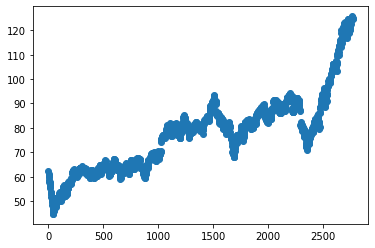

In [12]:
plt.scatter(X_train, Y_train)

In [13]:
df_lr_validate = pd.DataFrame(predictions, X_validation, columns = ["Y_pred"])
df_lr_train = pd.DataFrame(predictions_train, X_train, columns = ["Y_train"])

In [14]:
print(df_lr_validate.head())
print(df_lr_train.head())

          Y_pred
2451   96.001059
1035   71.495901
1287   75.856988
2579   98.216215
2703  100.362147
         Y_train
2097   89.874770
1779   84.371493
1282   75.770459
2696  100.241005
2143   90.670841


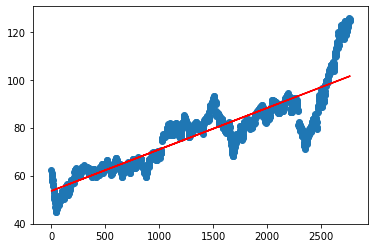

In [15]:
#Equation of Linear Regression
y=slope*X_train+intercept

#plotting the linear regression function
plt.plot(X_train, y, '-r')
plt.scatter(X_train,Y_train)

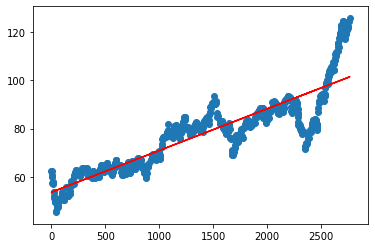

In [16]:
#Equation of Linear Regression
y=slope*X_validation+intercept

#plotting the linear regression function
plt.plot(X_validation, y, '-r')
plt.scatter(X_validation,Y_validation)


In [ ]:
# Calculate root mean squared error
def ols_metric(actual, predicted):
    y_t = predicted
    x_t = actual
    for 
 
# Test RMSE
actual = predictions
predicted = Y_validation
rmse = rmse_metric(actual, predicted)
print(rmse)